<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-качества-данных" data-toc-modified-id="Оценка-качества-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Оценка качества данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-столбцов-'VehicleType',-'Gearbox',-'Model',-'FuelType'-и-'NotRepaired'" data-toc-modified-id="Обработка-столбцов-'VehicleType',-'Gearbox',-'Model',-'FuelType'-и-'NotRepaired'-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Обработка столбцов 'VehicleType', 'Gearbox', 'Model', 'FuelType' и 'NotRepaired'</a></span></li><li><span><a href="#Обработка-столбцa-'RegistrationYear'" data-toc-modified-id="Обработка-столбцa-'RegistrationYear'-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработка столбцa 'RegistrationYear'</a></span></li><li><span><a href="#Обработка-столбцa-'RegistrationMonth" data-toc-modified-id="Обработка-столбцa-'RegistrationMonth-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Обработка столбцa 'RegistrationMonth</a></span></li><li><span><a href="#Обработка-оставшихся-столбцов" data-toc-modified-id="Обработка-оставшихся-столбцов-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Обработка оставшихся столбцов</a></span></li></ul></li><li><span><a href="#Разделение-на-выборки-и-OHE" data-toc-modified-id="Разделение-на-выборки-и-OHE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на выборки и OHE</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-Регрессия" data-toc-modified-id="Линейная-Регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Линейная Регрессия</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

**Признаки**<br>
DateCrawled — дата скачивания анкеты из базы<br>
VehicleType — тип автомобильного кузова<br>
RegistrationYear — год регистрации автомобиля<br>
Gearbox — тип коробки передач<br>
Power — мощность (л. с.)<br>
Model — модель автомобиля<br>
Kilometer — пробег (км)<br>
RegistrationMonth — месяц регистрации автомобиля<br>
FuelType — тип топлива<br>
Brand — марка автомобиля<br>
NotRepaired — была машина в ремонте или нет<br>
DateCreated — дата создания анкеты<br>
NumberOfPictures — количество фотографий автомобиля<br>
PostalCode — почтовый индекс владельца анкеты (пользователя)<br>
LastSeen — дата последней активности пользователя<br>

**Целевой признак**<br>
Price — цена (евро)<br>

## Подготовка данных

###  Оценка качества данных

In [1]:
# импортируем библиотеки
import time
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import Pool, CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# загрузка файла
#df = pd.read_csv('/datasets/autos.csv')
df = pd.read_csv('used_cars_data.csv')

In [3]:
# получение первых 5 строк таблицы
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
# общий анализ данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
# проверяем на наличие пропущенных значение
print('Всего NaN:',df.isnull().sum())

Всего NaN: DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


In [6]:
# список столбцов с NaN
df.columns[df.isna().any()].tolist()

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']

In [7]:
# проверка на дубликаты
print('Number of duplicates',df.duplicated().sum())

Number of duplicates 4


In [8]:
# проверка регистра в 'VehicleType', 'FuelType', 'Brand', 'Gearbox', 'Model'
object_type_cols = ['VehicleType', 'FuelType', 'Brand', 'Gearbox', 'Model']
for i in object_type_cols:
    print(df[i].unique())

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'porsche'
 'rover' 'land_rover' 'lada']
['manual' 'auto' nan]
['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk'

In [9]:
# проверка численных значений методом descibe()
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Цена('Price') — наша таргет переменная. Проверим корреляцию между переменными и ценой, прежде чем строить матрицу. Разделим числовые столбцы на 2 части для удобства.Также исключим «NumberOfPictures», поскольку этот столбец содержит только 0, и исключим «PostalCode», поскольку почтовый индекс не влияет на цену автомобиля.

In [10]:
numeric_cols1 = df[['Price','RegistrationYear','RegistrationMonth']] 
numeric_cols2 = df[['Price','Power','Kilometer']]

# нахождение корреляции
display(numeric_cols1.corr())
display(numeric_cols2.corr())

,Price,RegistrationYear,RegistrationMonth
Price,1.000000,0.026916,0.110581
RegistrationYear,0.026916,1.000000,-0.011619
RegistrationMonth,0.110581,-0.011619,1.000000


,Price,Power,Kilometer
Price,1.000000,0.158872,-0.333199
Power,0.158872,1.000000,0.024002
Kilometer,-0.333199,0.024002,1.000000


**Вывод:** Набор данных всего содержит 354 369 строк и 16 столбцов. Результаты:
1. 'RegistrationYear' имеет значение 9999 — это невозможное значение для номера года. Кроме того, есть данные о годах, начиная с 1000 и т.д. года - время задолго до изобретения автомобилей.
2. Столбец RegistrationMonth имеет значение 0 - это невозможное значение для обозначения номера месяца и требует проверки.
3. Неверный тип данных для 'DateCrawled' и 'DateCreated' — оба имеют тип "object", а должны быть должны быть "datetime64".
4. Значения NaN в столбцах 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired' .
5. Столбец 'NumberOfPictures' состоит только из 0 значений.
6. Корреляция 'Price'(цены авто) с переменными 'RegistrationYear', 'RegistrationMonth' и 'Power' имеет положительный, но слабый эффект. Это означает, что если одна из переменных увеличивается, то другая зависимая тоже будет увеличиваться, но не сильно. 'Price' и 'Mileage', однако, имеют слабую отрицательную корреляцию, то есть, если одна из переменных увеличивается, вместо этого уменьшается другая. Это кажется логичным, потому что чем больше пробег автомобиля, тем хуже его общее состояние (что приравнивается к качеству товара).
7. При построении матрицы рассеяния мы заметили выбросы данных и другие отклонения почти в каждом столбце с числовыми переменными:
    * «RegistrationYear» имеет необычную плотность в пределах 2002 года.
    * «RegistrationMonth» имеет много значений, распределенных вокруг 0, что странно
    * Необычная плотность около 0 также отмечена для диаграммы рассеяния «Price» и «Power» автомобиля.

Все эти проблемы могут быть либо ошибками при вводе данных (неправильный ввод пользователем намеренно или непреднамеренно), либо какой-то другой проблемой с данными. Мы не знаем источника этих исторических данных, поэтому мы не можем делать выводы о причинах этих аномальных значений данных. Эти данные должны быть обработаны в соответствии с нашими текущими потребностями.

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты визуализировала распределения!
</div>

### Предобработка данных

#### Обработка столбцов 'VehicleType', 'Gearbox', 'Model', 'FuelType' и 'NotRepaired'

Oбработаем NaN значения в каждом из этих столбцов.

* **'VehicleType'**

In [11]:
# проверяем значения
df['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [12]:
# находим пропущенные значения
df['VehicleType'].isna().sum()

37490

Из данных выше видно, что среди прочих видов автомобилей в списке есть значение 'other'('другое'). Всего в столбце 37490 пропущенных значений(NaN). Мы не можем предполагать, что это были за значения, но мы можем заполнить их значением 'other'.

In [13]:
# заполнение остальных пропущенных значений «other»
df['VehicleType'] = df['VehicleType'].fillna('other')

# находим пропущенные значения
df['VehicleType'].isna().sum()

0

In [14]:
# проверяем значения
df['VehicleType'].value_counts().sum()

354369

Готово.

* **'Gearbox'**

In [15]:
# проверяем значения
df['Gearbox'].value_counts()

manual    268251
auto       66285
Name: Gearbox, dtype: int64

In [16]:
# находим пропущенные значения
df['Gearbox'].isna().sum()

19833

Технически, в наше время существуют машины без коробки передач (например, Koenigsegg Regera) и в теории исключать вероятность что 19833 пропущенных значений в столбце 'GearBox' означают, что в машине нет коробки передач. Однако таких машин немного и это современная, не столько распространенная технология применяемая для дорогих автомобилей. Мы можем предположить, что эти пропуски  - скорее всего результат ошибки при вводе данных. 

Без проведения глубокого анализа мы не можем определить какие авто с, а какие без коробки передач, поэтому заполним пропуски значением 'unknown'('неизвестно')

In [17]:
# заполнение остальных пропущенных значений «other»
df['Gearbox'] = df['Gearbox'].fillna('unknown')

In [18]:
# проверка 

# находим пропущенные значения
df['Gearbox'].isna().sum()

0

Готово.

* **'Model'**

In [19]:
# проверяем значения
df['Model'].value_counts()

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64

In [20]:
# находим пропущенные значения
df['Model'].isna().sum()

19705

Как и в предыдущем шаге, заполняем пропущенные значения на 'other'

In [21]:
# заполнение остальных пропущенных значений «other»
df['Model'] = df['Model'].fillna('other')

# находим пропущенные значения
df['Model'].isna().sum()

0

In [22]:
# проверяем значения
df['Model'].value_counts().sum()

354369

Готово

* **'FuelType'**

In [23]:
# проверяем значения
df['FuelType'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [24]:
# находим пропущенные значения
df['FuelType'].isna().sum()

32895

Из данных выше видно, что среди прочих видов топлива в списке есть значение 'other'('другое'). Всего в столбце 32895 пропущенных значений(NaN). Мы не можем предполагать, что это были за значения, но мы можем заполнить их значением 'other'.

In [25]:
# заполнение остальных пропущенных значений «other»
df['FuelType'] = df['FuelType'].fillna('other')

In [26]:
# проверка 

# проверка значений
df['FuelType'].value_counts()

petrol      216352
gasoline     98720
other        33099
lpg           5310
cng            565
hybrid         233
electric        90
Name: FuelType, dtype: int64

Готово

* **'NotRepaired'**

In [27]:
# проверяем значения
df['NotRepaired'].value_counts()

no     247161
yes     36054
Name: NotRepaired, dtype: int64

In [28]:
# находим пропущенные значения
df['NotRepaired'].isna().sum()

71154

Из данных выше видно, что всего в столбце 71154 пропущенных значений(NaN). Мы не можем предполагать, что это были за значения, но мы можем заполнить их значением 'other'.

In [29]:
# заполнение остальных пропущенных значений «other»
df['NotRepaired'] = df['NotRepaired'].fillna('other')

In [30]:
# находим пропущенные значения
df['NotRepaired'].isna().sum()

0

**Вывод** мы обработали каждый из вышеупомянутых столбцов данных и заполнили пропуски. Однако для обучения нашей модели необходимо преобразовать категориальные признаки в численные, так как принадлежность к категории логистическая регрессия вычисляет по формуле, состоящей из признаков. Они могут быть только численные. Позже мы преобразуем признаки с помощью прямого кодирования (One-Hot Encoding).

#### Обработка столбцa 'RegistrationYear'

Ранее мы заметили, что столбец «RegistrationYear» имеет абнормальные значения, такие как год 1000 или 9999. Внимательнее посмотрим на данные:

In [31]:
#  проверка значений
df['RegistrationYear'].value_counts()

2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
6500        1
2290        1
1001        1
9450        1
3500        1
Name: RegistrationYear, Length: 151, dtype: int64

Диапазон данных слишком велик, кроме того, нам не нужны слишком старые или слишком нереалистичные данные, потому что они находятся далеко в «будущем» или «прошлом». Однако некоторые из пользователей могут продавать антикварные автомобили, поэтому в нашем случае мы также не можем исключить данные за 20 век. Год изобретения автомобиля 1886. Посмотрим значения данных для автомобилей с начала 20 века до настоящего года (2022).

In [32]:
# "слайсинг" данных до соответствующего диапазона
real_data = df.query('RegistrationYear >= 1900 and RegistrationYear < 2022')
real_data['RegistrationYear'].describe()

count    354198.000000
mean       2003.084789
std           7.536418
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: RegistrationYear, dtype: float64

Мы видим, что 50% наших данных сосредоточены между 2003 и 2019 годами (последний зарегистрированный год в данных). Также видно, что менее 25% данных распределено по автомобилям старше 1999 года выпуска. Поскольку процент автомобилей старше 1999 года слишком мал, мы можем его удалить. Также удалим данные после 2019 года, чтобы избавиться от выбросов данных.

In [33]:
# Еще больше сокращаем диапазон
df = df.query('RegistrationYear >= 1999 and RegistrationYear <= 2019')

# проверка значение
df['RegistrationYear'].describe()

count    274739.000000
mean       2005.792909
std           5.128485
min        1999.000000
25%        2002.000000
50%        2005.000000
75%        2009.000000
max        2019.000000
Name: RegistrationYear, dtype: float64

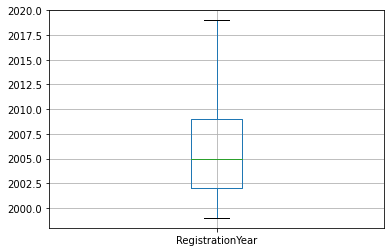

In [34]:
# построение "ящика с усами"
df.boxplot(column='RegistrationYear', return_type='axes')
plt.show()

Диаграмма "Ящик с усами" показывает, что большая часть данных сосредоточена между 2002 и 2009 годами, но нет выбросов. Этот столбец обработан, и мы можем двигаться дальше.

С этого момента мы будем использовать урезанную версию набора данных («modern_data»).

#### Обработка столбцa 'RegistrationMonth

Подробнее рассмотрим «RegistrationMonth» и выясним, почему он имеет значение 0, но мы будем использовать усеченный фрейм данных из предыдущего шага под названием «modern_data» (с годами 1999–2019).

Как мы видим, столбец «RegistrationMonth» не только имеет нулевые значения (когда каждое из значений от 1 до 12 должно представлять каждый месяц в году с января по декабрь), но также является третьим по величине значением по количеству строк (всего 23976 строк). Слишком много данных, чтобы просто отбросить их.

Проверим, есть ли конкретный год, в котором сосредоточено большинство "нулевых" месяцев.

Видно, что большинство записей с месяцем регистрации обозначенным как «0» относятся к 2000 году (всего 4871 значение). Мы не знаем причину присутствия этого значения в наборе данных, но можем предположить, что были определенные пользователи, которые ввели 0 в анкете (возможно, чтобы скрыть личную информацию). У нас нет идентификаторов пользователей в нашем наборе данных, но у нас есть почтовые индексы, которые указывают на определенное местоположение пользователя.

В общей сложности: 5575 пользователей с разными почтовыми индексами ввели 0 в качестве месяца регистрации автомобиля, но есть пользователи с почтовыми индексами, такими как 60314, 51371 и т. д., которые имеют более 1 записи данных с "нулевым" месяцем. Например, пользователь или пользователи с почтовыми индексами 60314 имеют в общей сложности 71 значение месяца "0" в качестве месяца регистрации их автомобиля. Это кажется подозрительным.

**Итог:** Мы не будем удалять эти данные, потому что месяц регистрации автомобиля не влияет на стоимость авто, но важно принять к сведению эту информацию и, возможно, принять меры для предотвращения возможных мошеннических действий пользователями.

#### Обработка оставшихся столбцов

При первичном анализе данных мы обнаружили, что 'NumberOfPictures' состоит только из 0. Убедимся в этом.

In [35]:
#  проверка значений
df['NumberOfPictures'].value_counts()

0    274739
Name: NumberOfPictures, dtype: int64

Так и есть. В таком случае у нас нет необходимости в данном столбце. Удалим его, а также удалим столбцы  'DateCrawled', 'DateCreated', 'LastSeen', 'Power' так как в них нет неоходимости при анализе данных.

In [36]:
df.drop(columns=['NumberOfPictures', 'DateCrawled', 'DateCreated', 'RegistrationMonth', 'LastSeen', 'PostalCode'], inplace=True)

#  проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274739 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             274739 non-null  int64 
 1   VehicleType       274739 non-null  object
 2   RegistrationYear  274739 non-null  int64 
 3   Gearbox           274739 non-null  object
 4   Power             274739 non-null  int64 
 5   Model             274739 non-null  object
 6   Kilometer         274739 non-null  int64 
 7   FuelType          274739 non-null  object
 8   Brand             274739 non-null  object
 9   NotRepaired       274739 non-null  object
dtypes: int64(4), object(6)
memory usage: 23.1+ MB


Напоследок проверим и удалим дубликаты

In [37]:
# удаление дубликатов
df.drop_duplicates(inplace = True)

In [38]:
# Проверка
df.shape[0]

239572

In [39]:
# Итоговая проверка результатов
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239572 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             239572 non-null  int64 
 1   VehicleType       239572 non-null  object
 2   RegistrationYear  239572 non-null  int64 
 3   Gearbox           239572 non-null  object
 4   Power             239572 non-null  int64 
 5   Model             239572 non-null  object
 6   Kilometer         239572 non-null  int64 
 7   FuelType          239572 non-null  object
 8   Brand             239572 non-null  object
 9   NotRepaired       239572 non-null  object
dtypes: int64(4), object(6)
memory usage: 20.1+ MB


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
1,18300,coupe,2011,manual,190,other,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,other
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no


**Вывод:** Мы обработали данные, заполнили пропуски

### Разделение на выборки и OHE

Разделим данные на признаки и целевой признак('Price')

In [40]:
features = df.drop(['Price'], axis=1)
target = df['Price']

In [41]:
features_ohe = pd.get_dummies(features, drop_first=True) 

Проведем One-Hot Encoding категориальных функций с параметром «drop_first» для обочения моделей

Разделение данных на выборки для моделей, где НЕ НУЖЕН OHE

In [42]:
# разделение данных на выбрки для моделей, где НЕ НУЖЕН OHE
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179679 entries, 205195 to 318410
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       179679 non-null  object
 1   RegistrationYear  179679 non-null  int64 
 2   Gearbox           179679 non-null  object
 3   Power             179679 non-null  int64 
 4   Model             179679 non-null  object
 5   Kilometer         179679 non-null  int64 
 6   FuelType          179679 non-null  object
 7   Brand             179679 non-null  object
 8   NotRepaired       179679 non-null  object
dtypes: int64(3), object(6)
memory usage: 13.7+ MB


Масштабирование данных на train выборке:

In [43]:
scaler = StandardScaler()
x_train[['RegistrationYear','Power','Kilometer']] = scaler.fit_transform(x_train[['RegistrationYear','Power','Kilometer']])
x_test[['RegistrationYear','Power','Kilometer']] = scaler.fit_transform(x_test[['RegistrationYear','Power','Kilometer']])
y_train = pd.DataFrame(scaler.fit_transform(y_train.values.reshape(-1,1)))
y_test = pd.DataFrame(scaler.fit_transform(y_test.values.reshape(-1,1)))

Разделение данных на выборки для моделей, где НУЖЕН OHE

In [44]:
# разделение данных на выбрки для моделей, где НУЖЕН OHE
x_train1, x_test1, y_train1, y_test1 = train_test_split(features_ohe, target, test_size=0.25, random_state=12345)

Масштабирование данных на train выборке:

In [45]:
scaler = StandardScaler()
x_train1[['RegistrationYear','Power','Kilometer']] = scaler.fit_transform(x_train[['RegistrationYear','Power','Kilometer']])
x_test1[['RegistrationYear','Power','Kilometer']] = scaler.fit_transform(x_test[['RegistrationYear','Power','Kilometer']])
y_train1 = pd.DataFrame(scaler.fit_transform(y_train.values.reshape(-1,1)))
y_test1 = pd.DataFrame(scaler.fit_transform(y_test.values.reshape(-1,1)))

Готово. Можно приступать к обучению моделей.

## Обучение моделей

Нам необходимо эффективно подобрать наилучшие параметры для построения предсказаний модели, а также сравнить RMSE моделей (оценка качества) и выбрать наилучшую из них. Мы обучим и проанализируем следующие модели:

* Linear Regression
* Gradient Boosting 
* XGBoost
* LightGBM
* XGBoost

Чтобы вручную не подбирать параметры для моделей и не копировать код, создадим функию с sklearn.model_selection.RandomizedSearchCV

In [46]:
def random_search_cv(model, parameters, x, y):
    # создаем «RandomizedSearchCV» с подсчетом очков для rmse
    random_search = RandomizedSearchCV(model, parameters, cv=5)
    
    # обучаем train выборку
    random_search.fit(x, y)
    
    # находим лучшие параметры
    print('Best parameters:', random_search.best_params_)
    
    # возвращаем лучшую модель
    return random_search.best_estimator_

<div class="alert alert-block alert-warning">
<b>Внесены изменения 2 :</b> OHE теперь только для LR, GradientBoosting и XGBoost
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 3):</b> ОК.
</div>

Другие модели не требует OHE, но линейная регрессия не может работать с категориальными признаками, поэтому проведем трансормацию:

### Линейная Регрессия

Обучим модель Линейной Регрессии и расчитаем время выполнения:

In [47]:
%%time
linnear_reg_model = LinearRegression().fit(x_train1, y_train1) # create model class

Wall time: 9.53 s


Построим предсказания для обучающей выборки

In [48]:
%%time
y_pred_train = linnear_reg_model.predict(x_train1) # predict values for train data

Wall time: 445 ms


Построим предсказания для тестовой выборки

In [49]:
%%time
y_pred_test = linnear_reg_model.predict(x_test1) # predict values for test data

Wall time: 167 ms


Найдем RMSE:

In [50]:
# print RMSE for train and test
print('RMSE обучающей выборки:', round(mean_squared_error(y_train1, y_pred_train) ** 0.5, 2))
print('RMSE тестовой выборки:', round(mean_squared_error(y_test1, y_pred_test) ** 0.5, 2))

RMSE обучающей выборки: 0.59
RMSE тестовой выборки: 0.59


### Gradient Boosting

Создадим класс модели

In [51]:
gbr_model = GradientBoostingRegressor(max_depth=9, n_estimators=40, random_state=12345) 
params = {'learning_rate': [.2, .4, .5]}

Найдем наилучшие параметры с помощью функции random_search_cv()

In [52]:
%%time
best_model = random_search_cv(gbr_model, params, x_train1, y_train1) 

C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packag

KeyboardInterrupt: 

Построим предсказания для обучающей выборки

In [ ]:
%%time
y_pred_train = best_model.predict(x_train1)

Построим предсказания для тестовой выборки

In [ ]:
%%time
y_pred_test = best_model.predict(x_test1)

In [ ]:
print('RMSE обучающей выборки:', round(mean_squared_error(y_train1, y_pred_train) ** 0.5, 2))
print('RMSE тестовой выборки:', round(mean_squared_error(y_test1, y_pred_test) ** 0.5, 2))

###  XGBoost

<div class="alert alert-block alert-warning">
<b>Внесены изменения 2 :</b> добавлен параметр feature_types='c', enable_categorical 
</div>

Создадим класс модели

In [53]:
xgb_model = XGBRegressor(max_depth=9, n_estimators=40, random_state=12345) 
params = {'learning_rate': [.2, .4, .5]}

Найдем лучшие параметры

In [54]:
%%time
best_model = random_search_cv(xgb_model, params, x_train1, y_train1) 

C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'learning_rate': 0.2}
Wall time: 12min 43s


Построим предсказания для обучающей выборки

In [55]:
%%time
y_pred_train = best_model.predict(x_train1) #

Wall time: 839 ms


Построим предсказания для тестовой выборки

In [56]:
%%time
y_pred_test = best_model.predict(x_test1) 

Wall time: 292 ms


Найдем RMSE

In [57]:
print('RMSE обучающей выборки:', round(mean_squared_error(y_train1, y_pred_train) ** 0.5, 2))
print('RMSE тестовой выборки:', round(mean_squared_error(y_test1, y_pred_test) ** 0.5, 2))

RMSE обучающей выборки: 0.36
RMSE тестовой выборки: 0.4


### LightGBM

Обучим модель

In [47]:
lgb_model = lgb.LGBMRegressor(max_depth=9, n_estimators=40, random_state=42) # create model class
params = {'learning_rate': [.2, .4, .5]}

<div class="alert alert-block alert-warning">
<b>Внесены изменения 2 :</b> Заменяем тип данных для категориальных признаков:
</div>

In [48]:
cat_features = ['VehicleType','Gearbox','Model','FuelType','Brand','NotRepaired']
num_features = ['RegistrationYear','Power','Kilometer']
lgb_x_train = pd.DataFrame()
for i in cat_features:
    lgb_x_train[i] = x_train[i].astype('category')
for i in num_features:
    lgb_x_train[i] = x_train[i]
    
# проверка
lgb_x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179679 entries, 205195 to 318410
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   VehicleType       179679 non-null  category
 1   Gearbox           179679 non-null  category
 2   Model             179679 non-null  category
 3   FuelType          179679 non-null  category
 4   Brand             179679 non-null  category
 5   NotRepaired       179679 non-null  category
 6   RegistrationYear  179679 non-null  float64 
 7   Power             179679 non-null  float64 
 8   Kilometer         179679 non-null  float64 
dtypes: category(6), float64(3)
memory usage: 6.7 MB


In [49]:
lgb_x_test = pd.DataFrame()
for i in cat_features:
    lgb_x_test[i] = x_test[i].astype('category')
for i in num_features:
    lgb_x_test[i] = x_test[i]
    
# проверка
lgb_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59893 entries, 65366 to 260116
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   VehicleType       59893 non-null  category
 1   Gearbox           59893 non-null  category
 2   Model             59893 non-null  category
 3   FuelType          59893 non-null  category
 4   Brand             59893 non-null  category
 5   NotRepaired       59893 non-null  category
 6   RegistrationYear  59893 non-null  float64 
 7   Power             59893 non-null  float64 
 8   Kilometer         59893 non-null  float64 
dtypes: category(6), float64(3)
memory usage: 2.2 MB


Найдем лучшие параметры

In [50]:
%%time
best_model = random_search_cv(lgb_model, params, lgb_x_train, y_train) # fit the model

C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'learning_rate': 0.2}
Wall time: 13.6 s


Построим предсказания для обучающей выборки

In [51]:
%%time
y_pred_train = best_model.predict(lgb_x_train) # predict values for train data

Wall time: 550 ms


Построим предсказания для тестовой выборки

In [52]:
%%time
y_pred_test = best_model.predict(lgb_x_test) # predict values for test data

Wall time: 315 ms


Найдем RMSE

In [53]:
print('RMSE обучающей выборки:', round(mean_squared_error(y_train, y_pred_train) ** 0.5, 2))
print('RMSE тестовой выборки:', round(mean_squared_error(y_test, y_pred_test) ** 0.5, 2))

RMSE обучающей выборки: 0.38
RMSE тестовой выборки: 0.4


### CatBoost

<div class="alert alert-block alert-warning">
<b>Внесены изменения 2 :</b>добавлен параметр cat_features
</div>

In [55]:
pool_train = Pool(x_train, y_train, cat_features = x_train.select_dtypes(include=object).columns.to_list())
pool_test = Pool(x_test, cat_features = x_train.select_dtypes(include=object).columns.to_list())

Создадим класс модели

In [56]:
#cat_model = CatBoostRegressor(max_depth=9, iterations=50, random_state=12345) # create model class
#params = {'learning_rate': [.2, .4, .5]}
cat_model = CatBoostRegressor(n_estimators=200,loss_function='RMSE',learning_rate=0.4,depth=3, task_type='CPU',random_state=1, verbose=False)

In [58]:
%%time
cat_model.fit(pool_train)

Wall time: 22.8 s


Найдем лучшие параметры

random_search = RandomizedSearchCV(cat_model, params, cv=5)

In [ ]:
%%time
best_model = random_search_cv(cat_model, params, x_train1, y_train1)

C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.8680199	total: 195ms	remaining: 9.54s
1:	learn: 0.7669635	total: 240ms	remaining: 5.75s
2:	learn: 0.6899656	total: 280ms	remaining: 4.39s
3:	learn: 0.6317670	total: 327ms	remaining: 3.75s
4:	learn: 0.5874616	total: 381ms	remaining: 3.42s
5:	learn: 0.5551982	total: 445ms	remaining: 3.26s
6:	learn: 0.5293218	total: 505ms	remaining: 3.1s
7:	learn: 0.5081861	total: 563ms	remaining: 2.96s
8:	learn: 0.4937209	total: 644ms	remaining: 2.93s
9:	learn: 0.4808646	total: 724ms	remaining: 2.9s
10:	learn: 0.4720218	total: 805ms	remaining: 2.85s
11:	learn: 0.4618064	total: 909ms	remaining: 2.88s
12:	learn: 0.4546409	total: 974ms	remaining: 2.77s
13:	learn: 0.4485327	total: 1.05s	remaining: 2.69s
14:	learn: 0.4441291	total: 1.11s	remaining: 2.59s
15:	learn: 0.4399804	total: 1.17s	remaining: 2.49s
16:	learn: 0.4364673	total: 1.22s	remaining: 2.38s
17:	learn: 0.4329130	total: 1.29s	remaining: 2.3s
18:	learn: 0.4301077	total: 1.44s	remaining: 2.35s
19:	learn: 0.4276595	total: 1.52s	remaining:

Построим предсказания для обучающей выборки

%%time
y_pred_train = best_model.predict(x_train1) m

In [59]:
y_pred = cat_model.predict(pool_test)

Построим предсказания для тестовой выборки

%%time
y_pred_test = best_model.predict(x_test1)

Найдем RMSE

#print('RMSE обучающей выборки:', round(mean_squared_error(y_train1, y_pred_train) ** 0.5, 2))
print('RMSE тестовой выборки:', round(mean_squared_error(y_test1, y_pred_test) ** 0.5, 2))

In [62]:
cb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE in y units:", np.mean(cb_rmse))

RMSE in y units: 0.41093405176432307


**Вывод:** мы обучили каждую из моделей, подобрали к ним наилучшие параметры и рассчитали RMSE. Проведем анализ моделей в следующем шаге

## Анализ моделей

Всего было проанализировано 5 моделей, среди которых:

|модели|время обучениясек|время предсказания|качество(RMSE)|
|---|---|---|---|
|LinearRegression|9с|167 мс|0.59|
|Gradient Boosting|1ч 35м 13с|294 мс|0.4|
|XGBoost|12м 43с|294 мс|0.4|
|LightGBM|13с|0.3 с|0.4|
|CatBoostRegressor|22c|0.5|0.4|

**Итог:** Модель XGBoost имеет лучшее значениеRMSE (0.4), но скорость обучения (13m). LightGBM имеет RMSE 0.4, но скорость обучения модели высокая (всего 13c). Быстрее LightGBM обучает только Linear Regression (9s), но RMSE у модели худшее (0.59). У CatBoost RMSE такое же, как у LightGBM (RMSE_test: 0.4), но скорость ниже (22с). Самая низкая скорость обучения при RMSE 0.4 зафиксирована у модели градиентного спуска: модель обучалась 1 час 35 минут

# Общий вывод

Нашей задачей было построение модели для определения стоимости автомобиля для службы продажи подержанных автомобилей, чтобы в дальнейшем разработать приложение для привлечения новых клиентов.

У модели LightGBM не самая высокая RMSE, но она не сильно отличается от моделей XGBoost и Gradient Boosting (примерно на 60 RMSE), однако скорость у этой модели феноминально высокая: 1 минута 57 секунд. Итог: модель LightGBM с параметром 'learning_rate': 0.5 - наилучшая модель.